<h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#1d3c45">Welcome</h1>


<h4><center><b>Hi, my name is Samet Arda ERDOGAN. I am a freshman in computer engineering. This is my first Machine Learning Notebook. Instead of creating and sharing a few standard ML models, I wrote a function as detailed as I could and tried to provide ease of processing with many parameters. Before this process, I tried to understand the data better with Data Preprocessing and Data Visualization </b></center></h4>

<br>

<center><b>
I will be waiting for your feedback :)
</b></center>

<center>
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">
<a href="https://www.linkedin.com/in/ardasamet/" class="social-icon si-rounded si-small si-linkedin">
  <i class="fa fa-linkedin"></i>
</a>
</center>

<hr style="width:100%;height:5px;border-width:0;color:gray;background-color:gray"> 

<h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:300%;text-align:left;border-radius: 10px 10px;color:#d2601a">Table Of Content</h1>

1. [Importing Libraries](#1) <br>
2. [Frist Look](#2) <br>
3. [Data Preprocessing](#3) <br>
    3.1. [Categorical Encoding](#4) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Polynomial Values](#5) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Binomial Value](#6) <br>
4. [Missing Values](#7) <br>
    4.1. [KNN Algorithm to fill missing values](#8)<br>
5. [Data Visualization](#9)<br>
    a. [Heat Map Correlation](#10) <br>
    b. [Gender | Count Plot](#11) <br>
    c. [Hypertension | Count Plot](#12) <br>
    d. [Ever Married | Count Plot](#13) <br>
    e. [Work Type | Count Plot](#14) <br>
    f. [Residence Type | Count Plot](#15) <br>
    g. [Smoking | Count Plot](#16) <br>
    h. [Stroke | Count Plot](#17) <br>
    i. [Pair Plot](#18) <br>
6. [Prediction](#19)<br>
    6.1. [Algorithms](#20) <br>
    6.2. ["Compare Algorithms" Function](#21) <br>
    6.3. [Results](#22) <br>
    

# <h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 5px 5px;color:#d2601a">Importing Libraries</h1> <a id="1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score, mean_squared_error,r2_score,recall_score,roc_auc_score,roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)


from imblearn.over_sampling import SMOTE

# <h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 5px 5px;color:#d2601a">First Look</h1> <a id="2"></a>

In [2]:
original_data = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df = original_data.copy()

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# It is not necessary
del df["id"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# <h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 5px 5px;color:#d2601a">Data Preprocessing</h1> <a id="3"></a>

## Categorical Encoding <a id="4"></a>

### Polynomial Values <a id="5"></a>

In [6]:
for i in df.select_dtypes(include=['object']).columns:
    if (len(np.unique(df[i])) > 2):
        print(f"==== [COLUMNS: {i}] ====")
        print(df[i].value_counts(),"\n")
        

==== [COLUMNS: gender] ====
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

==== [COLUMNS: work_type] ====
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

==== [COLUMNS: smoking_status] ====
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 



In [7]:
# There is only 1 value "Other" in "Gender" variable. Therefore, i drop this. After this, i will use "Label Encoder" to encode "gender".
df.drop(df[df.gender == "Other"].index[0],axis=0,inplace=True)

### Polynomial Values;

- work_type
- smoking_status

##### -> We will use "pandas.get_dummies" to encode polynomial values

In [8]:
df = pd.get_dummies(df,columns=["work_type"])

In [9]:
df = pd.get_dummies(df,columns=["smoking_status"])

##### 

### Binomial Values <a id="6"></a>

In [10]:
for i in df.select_dtypes(include=['object']).columns:
    if (len(np.unique(df[i])) <= 2):
        print(f"==== [COLUMNS: {i}] ====")
        print(df[i].value_counts(),"\n")
        

==== [COLUMNS: gender] ====
Female    2994
Male      2115
Name: gender, dtype: int64 

==== [COLUMNS: ever_married] ====
Yes    3353
No     1756
Name: ever_married, dtype: int64 

==== [COLUMNS: Residence_type] ====
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 



### Binomial Values;

- gender
- ever_married
- Residence_type

##### -> We will use "sklearn.preprocessing.LabelEncoder" to encode binomial values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df.gender = le.fit_transform(df.gender)

In [13]:
df.ever_married = le.fit_transform(df.ever_married)

In [14]:
df.Residence_type = le.fit_transform(df.Residence_type)

# 
# 

# <h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 5px 5px;color:#d2601a">Missing Values</h1> <a id="7"></a>

In [15]:
df.isna().sum()

gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

### KNN Algorithm | to fill missing values <a id="8"></a>

In [16]:
from sklearn.impute import KNNImputer

var_names = list(df)

imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)
df_filled = pd.DataFrame(df_filled,columns=var_names)
df.bmi = df_filled.bmi

In [17]:
df.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               1
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [18]:
# 1 value of "bmi" is nan. It is not necessary for now, let's drop it.
df.dropna(inplace=True)

# <h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 5px 5px;color:#d2601a">Data Visualization</h1> <a id="9"></a>

## Heat Map Correlation <a id="10"></a>

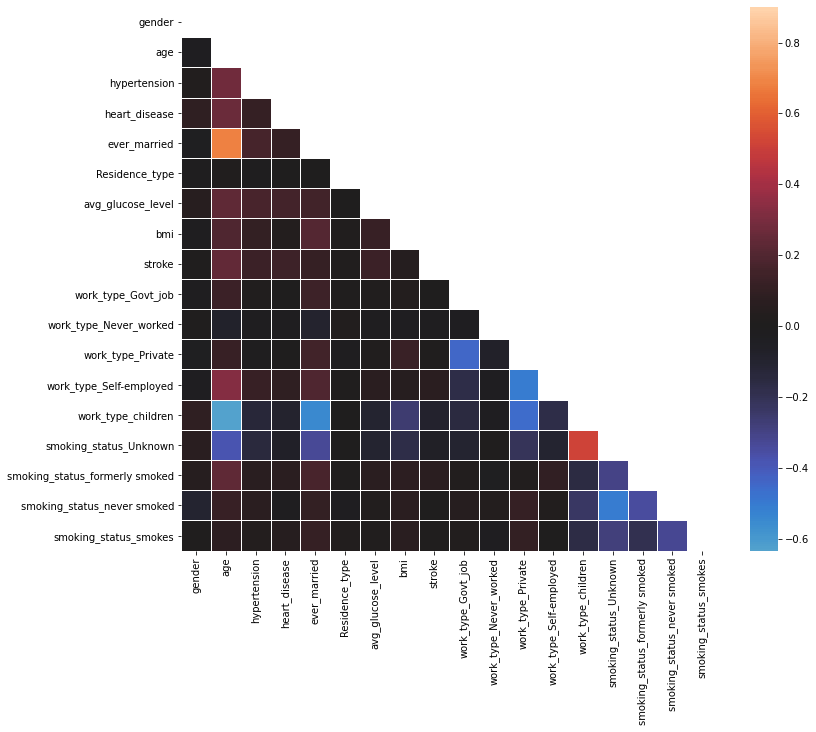

In [19]:
f, ax = plt.subplots(figsize=(12,10))

sns.heatmap(df.corr(),mask=(np.triu(np.ones_like(df.corr(),dtype=bool))),vmax=.9,center=0,linewidths=.8);

## Gender | Count Plot <a id="11"></a>

In [20]:
sns.set_palette("flare")
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

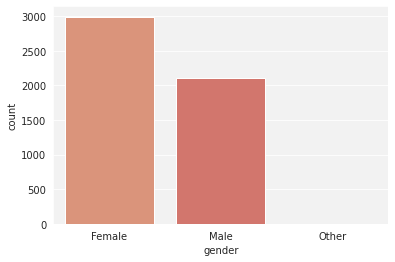

In [21]:
sns.countplot(data=original_data.sort_values(by="gender"), x="gender");

## Hypertension | Count Plot <a id="12"></a>

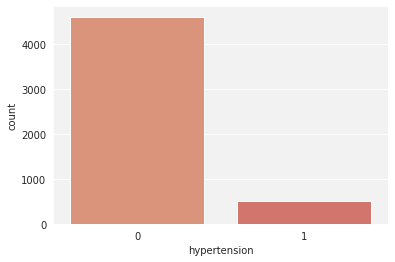

In [22]:
sns.countplot(data=original_data.sort_values(by="hypertension"), x="hypertension");

## Ever Married | Count Plot <a id="13"></a>

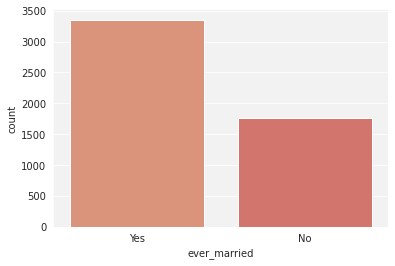

In [23]:
ax = sns.countplot(data=original_data, x="ever_married");

## Work Type | Count Plot <a id="14"></a>

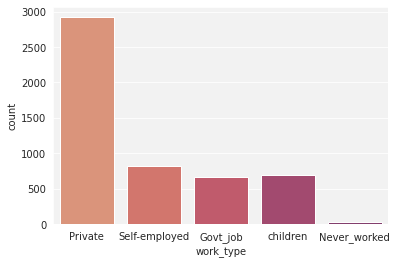

In [24]:
sns.countplot(data=original_data, x="work_type");

## Residence Type | Count Plot <a id="15"></a>

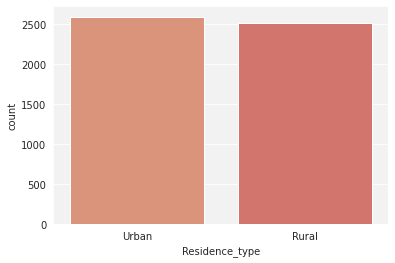

In [25]:
sns.countplot(data=original_data, x="Residence_type");


## Smoking | Count Plot <a id="16"></a>

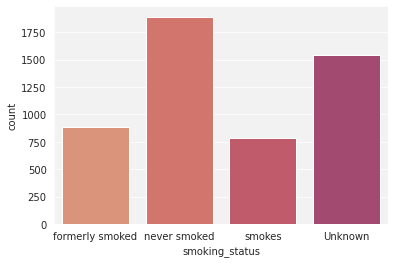

In [26]:
sns.countplot(data=original_data, x="smoking_status");

## Stroke | Count Plot <a id="17"></a>

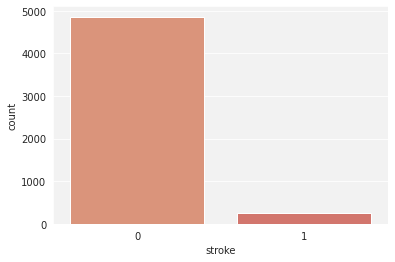

In [27]:
sns.countplot(data=original_data, x="stroke");

## Pair Plot <a id="18"></a>

<Figure size 720x720 with 0 Axes>

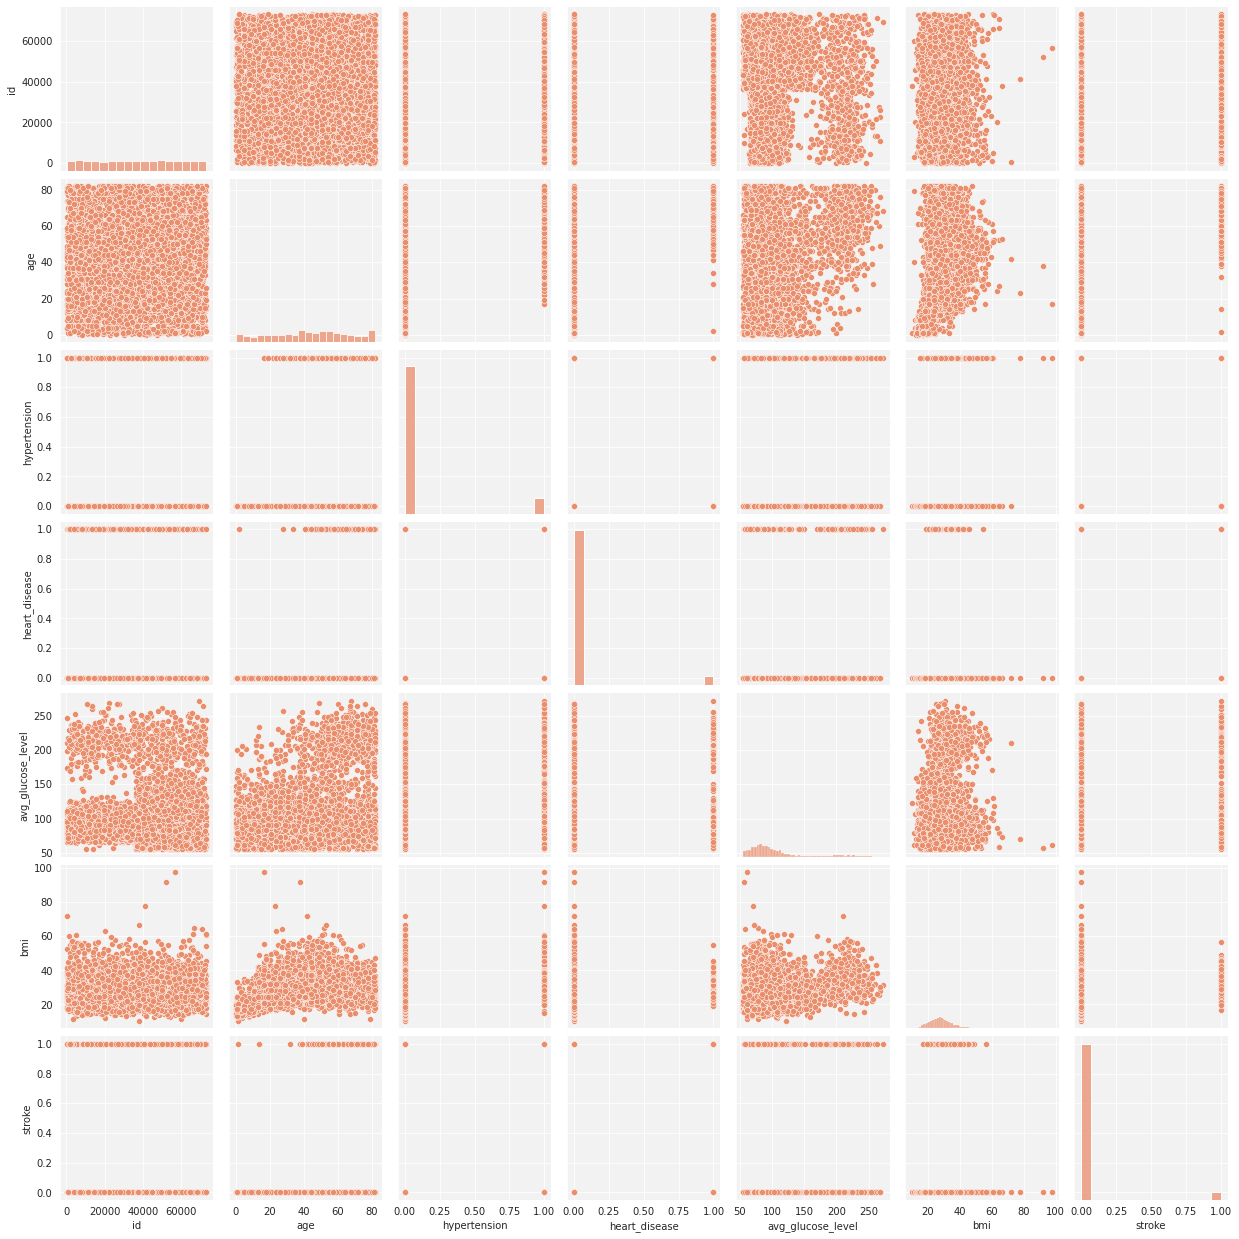

In [28]:
plt.figure(figsize=(10,10))
sns.pairplot(original_data);

# <h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 5px 5px;color:#d2601a">Prediction</h1> <a id="19"></a>

## Algorithms <a id="20"></a>

In [29]:
algorithms = [
    KNeighborsClassifier,
    MLPClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    LGBMClassifier,
    XGBClassifier,
]

## "CompareAlgorithms" Function;  <a id="21"></a>

In [30]:
def CompareAlgorithms(df,                                 
                      Y,                                  
                      algorithm,                         
                      feature_importance=False,           
                      get_recall_score=True,
                      get_f1_score=True,
                      get_accuracy_score=True,
                      get_precision_score=True,
                      get_roc_auc_score=True,
                      get_confusion_matrix=True,
                      get_classification_report=True,
                      Smote = False,
                      metrics_average = None,
                      feature_scaling = False,
                      get_cv=False):
    
    
    """
    parametres                  | Description
    
    df                            Dataframe 
    algorithm                     Algorithm
    feature_importance            plots feature importance graph
    get_recall_score              calculates recall score
    get_accuracy_score            calculates accuracy score
    get_precision_score           calculates precision score
    get_roc_auc_score             calculates roc/auc score
    get_confusion_matrix          shows confusion matrix 
    get_classification_report     shows classification report
    Smote                         uses "SMOTE" method
    metrics_average               which method will be used when calculating the scores
    feature_scaling               implements StandardScaler to x_train and x_test 
    get_cv                        uses "K-FOLD and cross_val_score" to calculate average model success
    """
    
    
    scores = {"Algorithm":algorithm.__name__}
    
    
    """ Dependent & Independent Variables"""
    y = df[Y]
    X = df.drop([Y],axis=1)
    
    
    """ Train / Test Split """
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=11,shuffle=True)

    
    """ Feature Scaling """
    if feature_scaling:
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

    """ SMOTE """
    if Smote:
        sm = SMOTE(random_state=24)
        x_train, y_train = sm.fit_resample(x_train,y_train.ravel())

        
    """ Create Model """
    model = algorithm().fit(x_train,y_train)
    
    
    
    """ Prediction """
    y_pred = model.predict(x_test)
    
    
    """ Scores """
    if get_accuracy_score: 
        scores["accuracy_score"] = accuracy_score(y_test,y_pred)*100
    if get_precision_score:
        scores["precision_score"] = precision_score(y_test,y_pred,average = metrics_average)*100
    if get_recall_score:
        scores["recall_score"] = recall_score(y_test,y_pred,average = metrics_average)*100
    if get_f1_score:
        scores["f1_score"] = f1_score(y_test,y_pred,average = metrics_average)*100
    if get_roc_auc_score:
        scores["roc_auc_score"] = roc_auc_score(y_test,y_pred)*100
    
            
    """ K FOLD + CV """
    if get_cv:
        kfold = KFold(n_splits=3,random_state=2,shuffle=True)
        accuracy_score_cv = cross_val_score(model,x_test,y_test,cv=kfold,scoring = "accuracy").mean()
        scores["accuracy_score_cv"] = accuracy_score_cv
    
    
    """ Confusion Matrix """
    if get_confusion_matrix:
        cm = confusion_matrix(y_test,y_pred)
        print(f"""=== {algorithm.__name__} Confusion Matrix ===\n {cm} \n""")
    
    
    """ Classification Report """
    if get_classification_report:
        print(f"""=== {algorithm.__name__} Classification Report ===\n\n""")
        print(classification_report(y_test, y_pred))
    
    
    """ Features Importance """
    
    if feature_importance:
        print("="*50)
        try:
            feature_imp = pd.Series(model.feature_importances_*100,index=x_train.columns).sort_values(ascending=False)
            sns.barplot(x=feature_imp,y=feature_imp.index)
            plt.title(f"Features Importance: {algorithm.__name__}")
            plt.xlabel("Features Importance")
            plt.ylabel("Features")
            plt.show()
        except:
            pass
        finally:
            print("="*50)
            print("\n")
    
    
        
    """
    return scores (type: dict)
    """
    return scores

=== KNeighborsClassifier Confusion Matrix ===
 [[1582   12]
 [  91    1]] 

=== KNeighborsClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1594
           1       0.08      0.01      0.02        92

    accuracy                           0.94      1686
   macro avg       0.51      0.50      0.49      1686
weighted avg       0.90      0.94      0.92      1686



=== MLPClassifier Confusion Matrix ===
 [[1588    6]
 [  86    6]] 

=== MLPClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1594
           1       0.50      0.07      0.12        92

    accuracy                           0.95      1686
   macro avg       0.72      0.53      0.54      1686
weighted avg       0.92      0.95      0.93      1686



=== LogisticRegression Confusion Matrix ===
 [[1594    0]
 [  92    0]] 

=== LogisticRegression C

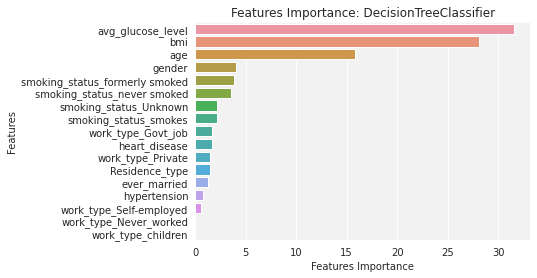



=== RandomForestClassifier Confusion Matrix ===
 [[1590    4]
 [  91    1]] 

=== RandomForestClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1594
           1       0.20      0.01      0.02        92

    accuracy                           0.94      1686
   macro avg       0.57      0.50      0.50      1686
weighted avg       0.91      0.94      0.92      1686



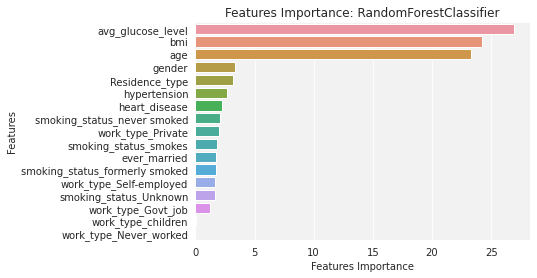



=== GradientBoostingClassifier Confusion Matrix ===
 [[1588    6]
 [  89    3]] 

=== GradientBoostingClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1594
           1       0.33      0.03      0.06        92

    accuracy                           0.94      1686
   macro avg       0.64      0.51      0.52      1686
weighted avg       0.91      0.94      0.92      1686



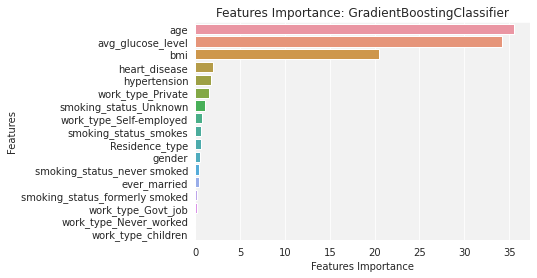



=== LGBMClassifier Confusion Matrix ===
 [[1578   16]
 [  90    2]] 

=== LGBMClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1594
           1       0.11      0.02      0.04        92

    accuracy                           0.94      1686
   macro avg       0.53      0.51      0.50      1686
weighted avg       0.90      0.94      0.92      1686



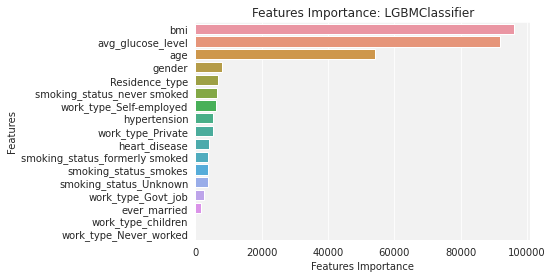



[18:37:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
=== XGBClassifier Confusion Matrix ===
 [[1572   22]
 [  87    5]] 

=== XGBClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1594
           1       0.19      0.05      0.08        92

    accuracy                           0.94      1686
   macro avg       0.57      0.52      0.53      1686
weighted avg       0.91      0.94      0.92      1686



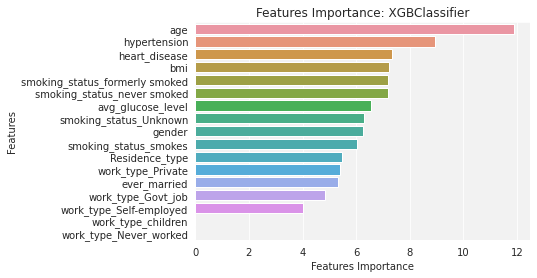

In [31]:
scoresDF = pd.DataFrame()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for algorithm in algorithms:
            score=CompareAlgorithms(df,
                                    "stroke",
                                    algorithm,
                                    feature_importance=True,
                                    get_cv=False,
                                    metrics_average="binary")

            scoresDF = scoresDF.append(score, ignore_index=True)
        

# 
# 
# <h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 5px 5px;color:#d2601a">Results</h1> <a id="22"></a>

In [32]:
scoresDF

,Algorithm,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
0,KNeighborsClassifier,93.890866,1.904762,7.692308,1.086957,50.167067
1,MLPClassifier,94.543298,11.538462,50.000000,6.521739,53.072664
2,LogisticRegression,94.543298,0.000000,0.000000,0.000000,50.000000
3,DecisionTreeClassifier,88.730724,6.862745,6.250000,7.608696,50.510747
4,RandomForestClassifier,94.365362,2.061856,20.000000,1.086957,50.418008
5,GradientBoostingClassifier,94.365362,5.940594,33.333333,3.260870,51.442229
6,LGBMClassifier,93.712930,3.636364,11.111111,2.173913,50.585074
7,XGBClassifier,93.534994,8.403361,18.518519,5.434783,52.027303


In [33]:
# Sort values;
scoresDF.sort_values(by="accuracy_score",ascending = False,inplace=True)

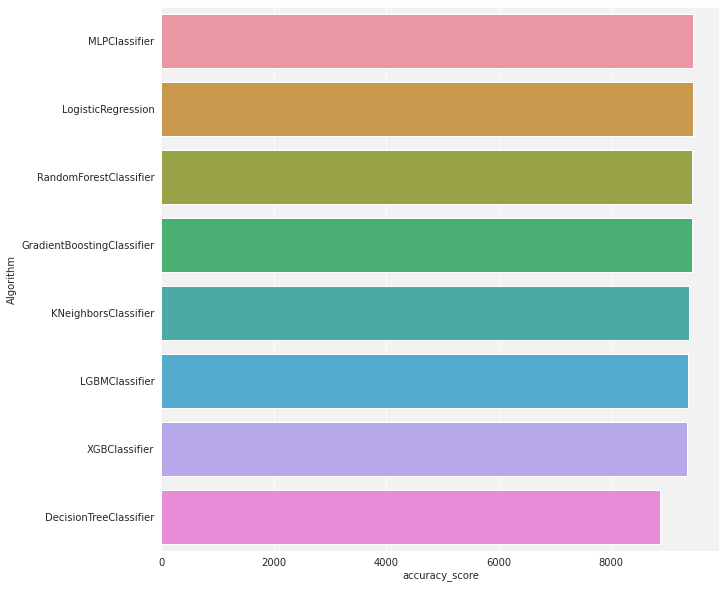

In [34]:
# accuracy_score plot
plt.figure(figsize=(10,10))
sns.barplot(x=scoresDF["accuracy_score"]*100,y=scoresDF["Algorithm"]);

<hr style="width:100%;height:5px;border-width:0;color:gray;background-color:gray"> 


<h1 style="background-color:#fff1e1;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#1d3c45">I will be waiting for your feedback :)</h1>


<center>
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">
<a href="https://www.linkedin.com/in/ardasamet/" class="social-icon si-rounded si-small si-linkedin">
  <i class="fa fa-linkedin"></i>
</a>
</center>

